<a href="https://colab.research.google.com/github/MasrukHabib/Practice-of-Machine-Learning/blob/main/Covert_the_json_to_csv_file_and_balance_the_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
# Import necessary libraries
import pandas as pd
import json

In [37]:
# Load the JSON file
file_path = '/content/kits.json'
with open(file_path, 'r') as file:
    data = json.load(file)

In [38]:
# Convert JSON to DataFrame
df = pd.DataFrame(data)

In [39]:
# Save DataFrame as CSV
csv_file_path = '/content/kits.csv'
df.to_csv(csv_file_path, index=False)

In [40]:
print(f'CSV file saved at {csv_file_path}')

CSV file saved at /content/kits.csv


In [41]:
import pandas as pd
df = pd.read_csv("/content/kits.csv")
df.head()

,case_id,age_at_nephrectomy,gender,body_mass_index,comorbidities,smoking_history,age_when_quit_smoking,pack_years,chewing_tobacco_use,alcohol_use,...,surgical_approach,operative_time,cytoreductive,positive_resection_margins,last_preop_egfr,first_postop_egfr,last_postop_egfr,vital_status,vital_days_after_surgery,voxel_spacing
0,case_00000,49,male,29.47,"{'myocardial_infarction': False, 'congestive_h...",never_smoked,not_applicable,0.0,never_or_not_in_last_3mo,two_or_less_daily,...,Transperitoneal,324.0,False,False,"{'value': 77.0, 'days_before_nephrectomy': 54}","{'value': 76.0, 'days_before_nephrectomy': 184}","{'value': '>=90', 'days_before_nephrectomy': 1...",censored,1420,"{'x_spacing': 0.919921875, 'y_spacing': 0.9199..."
1,case_00001,50,male,33.71,"{'myocardial_infarction': False, 'congestive_h...",previous_smoker,33,7.0,never_or_not_in_last_3mo,two_or_less_daily,...,Retroperitoneal,293.0,False,False,"{'value': 67.0, 'days_before_nephrectomy': 1}","{'value': 58.0, 'days_before_nephrectomy': 117}","{'value': 56.0, 'days_before_nephrectomy': 1401}",censored,1401,"{'x_spacing': 0.798828125, 'y_spacing': 0.7988..."
2,case_00002,74,male,28.13,"{'myocardial_infarction': False, 'congestive_h...",current_smoker,not_applicable,50.0,never_or_not_in_last_3mo,never_or_not_in_last_3mo,...,Transperitoneal,229.0,False,False,"{'value': None, 'days_before_nephrectomy': None}","{'value': 85.0, 'days_before_nephrectomy': 76}","{'value': 83.0, 'days_before_nephrectomy': 1185}",censored,1185,"{'x_spacing': 0.939453125, 'y_spacing': 0.9394..."
3,case_00003,44,female,38.69,"{'myocardial_infarction': False, 'congestive_h...",previous_smoker,NaN,NaN,never_or_not_in_last_3mo,two_or_less_daily,...,Transperitoneal,180.0,False,False,"{'value': 86.0, 'days_before_nephrectomy': 61}","{'value': 80.0, 'days_before_nephrectomy': 114}","{'value': 80.0, 'days_before_nephrectomy': 114}",censored,114,"{'x_spacing': 0.85546875, 'y_spacing': 0.85546..."
4,case_00004,73,male,28.59,"{'myocardial_infarction': False, 'congestive_h...",previous_smoker,55,NaN,never_or_not_in_last_3mo,never_or_not_in_last_3mo,...,Transperitoneal,123.0,False,False,"{'value': None, 'days_before_nephrectomy': None}","{'value': 45.0, 'days_before_nephrectomy': 500}","{'value': 45.0, 'days_before_nephrectomy': 500}",censored,500,"{'x_spacing': 0.9765625, 'y_spacing': 0.976562..."


In [42]:
df['malignant'].nunique()

2

In [43]:
import pandas as pd

# Calculate class distribution
class_distribution = df['malignant'].value_counts()

# Print class distribution
print("Class Distribution:")
print(class_distribution)

# Check if data is balanced
balanced = class_distribution.min() / class_distribution.max() >= 0.5

if balanced:
    print("The data is balanced.")
else:
    print("The data is imbalanced.")

Class Distribution:
malignant
True     192
False     18
Name: count, dtype: int64
The data is imbalanced.


In [45]:
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer

# Identify categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Apply Label Encoding to categorical columns
label_encoders = {}
for col in categorical_cols:
    label_encoders[col] = LabelEncoder()
    df[col] = label_encoders[col].fit_transform(df[col])

# Separate features and target
X = df.drop('malignant', axis=1)
y = df['malignant']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Handling missing values
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Applying SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train_imputed, y_train)

# Checking the distribution after resampling
class_distribution_resampled = y_resampled.value_counts()

# Print the class distribution after resampling
print("Class Distribution after Resampling:")
print(class_distribution_resampled)

# Check if data is balanced after resampling
balanced_resampled = class_distribution_resampled.min() / class_distribution_resampled.max() >= 0.5

if balanced_resampled:
    print("The data is balanced after resampling.")
else:
    print("The data is still imbalanced after resampling.")

# Creating a balanced DataFrame
balanced_df = pd.DataFrame(X_resampled, columns=X.columns)
balanced_df['malignant'] = y_resampled

# Saving the balanced dataset to a CSV file
balanced_df.to_csv('kits_balanced_dataset.csv', index=False)

print("Balanced dataset saved to 'kits_balanced_dataset.csv'")

Class Distribution after Resampling:
malignant
True     134
False    134
Name: count, dtype: int64
The data is balanced after resampling.
Balanced dataset saved to 'kits_balanced_dataset.csv'


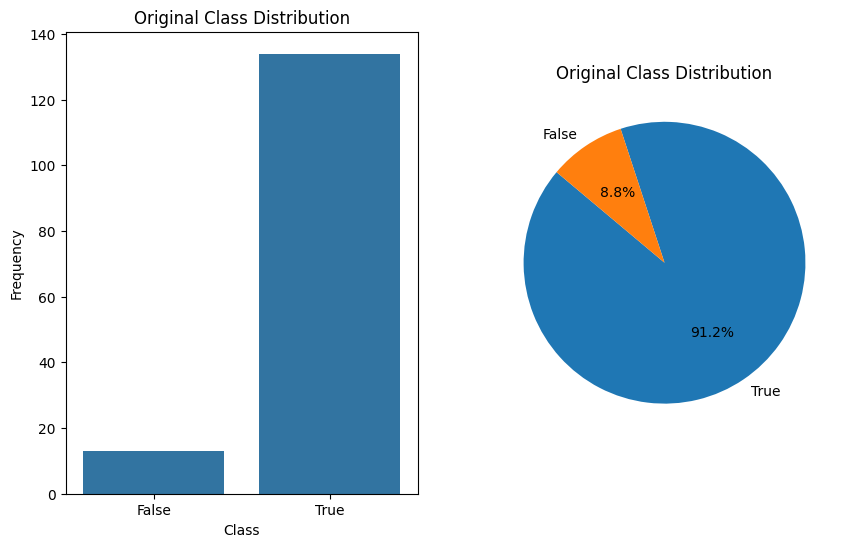

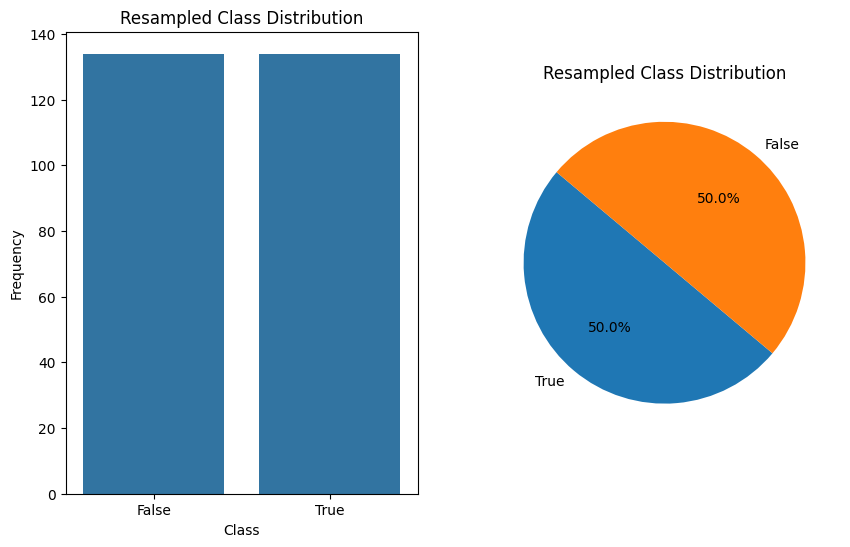

Balanced dataset saved to 'kits_balanced_dataset.csv'


In [52]:
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns


# Plot original class distribution
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
original_distribution = y_train.value_counts()
sns.barplot(x=original_distribution.index, y=original_distribution.values)
plt.title('Original Class Distribution')
plt.xlabel('Class')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.pie(original_distribution, labels=original_distribution.index, autopct='%1.1f%%', startangle=140)
plt.title('Original Class Distribution')

plt.show()


# Plot resampled class distribution
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
sns.barplot(x=class_distribution_resampled.index, y=class_distribution_resampled.values)
plt.title('Resampled Class Distribution')
plt.xlabel('Class')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.pie(class_distribution_resampled, labels=class_distribution_resampled.index, autopct='%1.1f%%', startangle=140)
plt.title('Resampled Class Distribution')

plt.show()

# Creating a balanced DataFrame
balanced_df = pd.DataFrame(X_resampled, columns=X.columns)
balanced_df['malignant'] = y_resampled

# Saving the balanced dataset to a CSV file
balanced_df.to_csv('kits_balanced_dataset.csv', index=False)

print("Balanced dataset saved to 'kits_balanced_dataset.csv'")


In [48]:
df

,case_id,age_at_nephrectomy,gender,body_mass_index,comorbidities,smoking_history,age_when_quit_smoking,pack_years,chewing_tobacco_use,alcohol_use,...,surgical_approach,operative_time,cytoreductive,positive_resection_margins,last_preop_egfr,first_postop_egfr,last_postop_egfr,vital_status,vital_days_after_surgery,voxel_spacing
0,0,49,1,29.47,0,1,35,0.0,0,2,...,1,324.0,False,False,99,123,5,0,1420,141
1,1,50,1,33.71,0,2,8,7.0,0,2,...,0,293.0,False,False,67,78,71,0,1401,86
2,2,74,1,28.13,22,0,35,50.0,0,1,...,1,229.0,False,False,142,144,139,0,1185,146
3,3,44,0,38.69,0,2,36,NaN,0,2,...,1,180.0,False,False,131,134,134,0,114,115
4,4,73,1,28.59,9,2,26,NaN,0,1,...,1,123.0,False,False,142,49,50,0,500,162
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205,205,67,0,31.09,0,2,36,NaN,0,2,...,1,179.0,False,False,54,83,82,0,843,80
206,206,66,0,42.90,0,2,0,2.0,0,2,...,1,186.0,False,False,75,44,44,0,800,157
207,207,65,1,27.50,13,1,35,0.0,0,2,...,1,188.0,True,False,39,22,25,1,892,63
208,208,73,1,30.85,10,2,36,64.0,0,2,...,1,613.0,False,False,28,40,27,0,1057,132


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 38 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   case_id                         210 non-null    int64  
 1   age_at_nephrectomy              210 non-null    int64  
 2   gender                          210 non-null    int64  
 3   body_mass_index                 210 non-null    float64
 4   comorbidities                   210 non-null    int64  
 5   smoking_history                 210 non-null    int64  
 6   age_when_quit_smoking           210 non-null    int64  
 7   pack_years                      143 non-null    float64
 8   chewing_tobacco_use             210 non-null    int64  
 9   alcohol_use                     210 non-null    int64  
 10  intraoperative_complications    210 non-null    int64  
 11  hospitalization                 210 non-null    int64  
 12  ischemia_time                   210 